# Linear response

Here we calculate the linear response of a strongly-driven Duffing resonator as presented in https://doi.org/10.1103/PhysRevX.10.021066.

We use the Jacobian of the harmonic equations as explained here: https://nonlinearoscillations.github.io/HarmonicBalance.jl/stable/examples/linear_response/

In [12]:
using Revise, HarmonicBalance
include("../plotting.jl")
@variables α, ω, ω0, F, t, η, x(t), γ; # declare constant variables and a function x(t)

In [13]:
# define ODE
diff_eq = DifferentialEquation(d(x,t,2) + ω0*x + α*x^3 + η*d(x,t)*x^2+ γ*d(x,t) ~ F*cos(ω*t), x)

# specify the ansatz x = u(T) cos(ωt) + v(T) sin(ωt)
add_harmonic!(diff_eq, x, ω) 

# implement ansatz to get harmonic equations
harmonic_eq = get_harmonic_equations(diff_eq)

A set of 2 harmonic equations
Variables: u1(T), v1(T)
Parameters: α, ω, γ, ω0, η, F

Harmonic ansatz: 
x(t) = u1(T)*cos(ωt) + v1(T)*sin(ωt)

Harmonic equations:

ω0*u1(T) + γ*Differential(T)(u1(T)) + (3//4)*α*(u1(T)^3) + γ*ω*v1(T) + (2//1)*ω*Differential(T)(v1(T)) + (3//4)*α*(v1(T)^2)*u1(T) + (1//4)*η*ω*(v1(T)^3) + (3//4)*η*(u1(T)^2)*Differential(T)(u1(T)) + (1//4)*η*(v1(T)^2)*Differential(T)(u1(T)) + (1//4)*η*ω*(u1(T)^2)*v1(T) + (1//2)*η*u1(T)*v1(T)*Differential(T)(v1(T)) - (ω^2)*u1(T) ~ F

ω0*v1(T) + γ*Differential(T)(v1(T)) + (3//4)*α*(v1(T)^3) + (1//4)*η*(u1(T)^2)*Differential(T)(v1(T)) + (3//4)*α*(u1(T)^2)*v1(T) + (3//4)*η*(v1(T)^2)*Differential(T)(v1(T)) + (1//2)*η*u1(T)*v1(T)*Differential(T)(u1(T)) - (ω^2)*v1(T) - (2//1)*ω*Differential(T)(u1(T)) - (1//4)*η*ω*(u1(T)^3) - γ*ω*u1(T) - (1//4)*η*ω*(v1(T)^2)*u1(T) ~ 0


# strong drive - nonlinear regime

Solving via total degree homotopy ... 100%|██████████████████████████████████████████████████| Time: 0:00:01


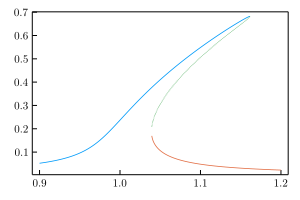

In [14]:
x_axis = LinRange(0.9, 1.2, 500)

fixed = (α => 1, ω0 => 1.0, γ => 1E-3, F => 1E-2, η => 1E-1, ω => 1.0)   # fixed parameters
swept = ω => x_axis           # range of parameter values
result = get_steady_states(harmonic_eq, swept, fixed)

plot1D(result, x="ω", y="sqrt(u1^2 + v1^2)", size=(300, 200))

In [15]:
HarmonicBalance.LinearResponse.JacobianSpectrum(result, index=1, branch=1)[x]

Lorentzian peaks (central frequency ω0, linewidth Γ): 
5.495e-05 * L(ω0 = 7.921911e-01, Γ = -6.358e-04)
5.495e-05 * L(ω0 = 7.921911e-01, Γ = -6.358e-04)
2.000e+00 * L(ω0 = 1.007809e+00, Γ = -6.358e-04)
2.000e+00 * L(ω0 = 1.007809e+00, Γ = -6.358e-04)


In [16]:
result.jacobian(result[1][1])

2×2 Matrix{ComplexF64}:
 -0.000655006-9.14927e-47im      0.106685+9.72681e-46im
    -0.108945-2.91871e-45im  -0.000616528-4.15533e-47im

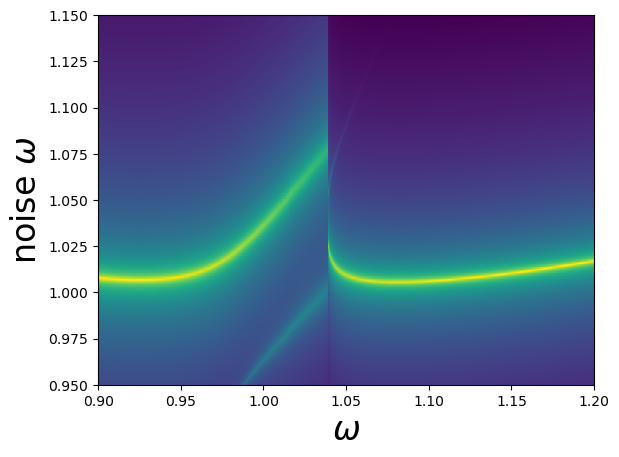

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall /home/hrochan/.julia/packages/PyCall/L0fLP/src/numpy.jl:67
findfont: Font family ['Times'] not found. Falling back to DejaVu Sans.


In [17]:
y_axis = LinRange(0.95,1.15,500)
data = HarmonicBalance.LinearResponse.plot_jacobian_spectrum(result, x, 
    Ω_range=y_axis, branch=1, logscale=true);

data2 = HarmonicBalance.LinearResponse.plot_jacobian_spectrum(result, x, 
    Ω_range=y_axis, branch=2, logscale=true);

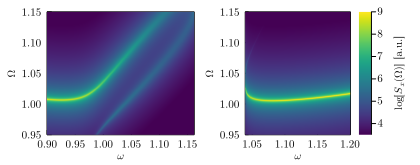

In [18]:
p1 = heatmap(data..., size=(180, 120), c=:viridis, xlabel="\$ ω \$", ylabel="\$ Ω \$", 
    legend=false, clim=(3.5,9),
right_margin=-1mm)

p2 = heatmap(data2..., size=(230, 120), c=:viridis, xlabel="\$ ω \$", ylabel="\$ Ω \$", 
    colorbar_title=text("\$ \\log[S_{x}(\\Omega)] \$ [a.u.]", 7, "Computer Modern"),
bottom_margin=-0mm, clim=(3.5,9))

Plots.plot(p1,p2, size=(420, 165))

In [19]:
savefig(dir * "/linresp/duffing_noise.svg")